In [6]:
import re

pattern = r'^1AM\d{2}[A-Z]{2}\d{3}$'
usn = "1AM23CI062"

if re.match(pattern, usn):
    print("Valid USN")
else:
    print("Invalid USN")

Valid USN


In [2]:
from ultralytics import YOLO

# Load a model

model = YOLO("models/best.pt")  # load a custom model

# Predict with the model
results = model("images/IMG-20240704-WA0002.jpg")  # predict on an image


image 1/1 /home/khushwant/csai/Experiments/images/IMG-20240704-WA0002.jpg: 640x640 1 1AM23CI062, 6.7ms
Speed: 4.2ms preprocess, 6.7ms inference, 172.3ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '1AM23CI062'}
 obb: None
 orig_img: array([[[ 25,  44,  51],
         [ 26,  45,  52],
         [ 28,  47,  54],
         ...,
         [174, 183, 187],
         [164, 173, 177],
         [164, 173, 177]],
 
        [[ 32,  51,  58],
         [ 33,  52,  59],
         [ 36,  55,  62],
         ...,
         [171, 180, 184],
         [163, 172, 176],
         [163, 172, 176]],
 
        [[ 44,  63,  70],
         [ 45,  64,  71],
         [ 46,  65,  72],
         ...,
         [166, 175, 178],
         [161, 170, 173],
         [161, 170, 173]],
 
        ...,
 
        [[102, 119, 132],
         [103, 120, 133],
         [103, 120, 133],
         ...,
         [124, 140, 146],
         [122, 138, 144],
         [122, 138, 144]],
 
        [[104, 121, 134],
         [104, 121, 134],
         [103, 120, 133],
         ...,
         [124,

In [17]:
result = results[0] if isinstance(results, list) else results

In [18]:
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '1AM23CI062'}
obb: None
orig_img: array([[[ 25,  44,  51],
        [ 26,  45,  52],
        [ 28,  47,  54],
        ...,
        [174, 183, 187],
        [164, 173, 177],
        [164, 173, 177]],

       [[ 32,  51,  58],
        [ 33,  52,  59],
        [ 36,  55,  62],
        ...,
        [171, 180, 184],
        [163, 172, 176],
        [163, 172, 176]],

       [[ 44,  63,  70],
        [ 45,  64,  71],
        [ 46,  65,  72],
        ...,
        [166, 175, 178],
        [161, 170, 173],
        [161, 170, 173]],

       ...,

       [[102, 119, 132],
        [103, 120, 133],
        [103, 120, 133],
        ...,
        [124, 140, 146],
        [122, 138, 144],
        [122, 138, 144]],

       [[104, 121, 134],
        [104, 121, 134],
        [103, 120, 133],
        ...,
        [124, 140, 146],
        [121, 137, 143],
        [

In [19]:
result.names

{0: '1AM23CI062'}

In [24]:
json = result.names
json.values()

dict_values(['1AM23CI062'])

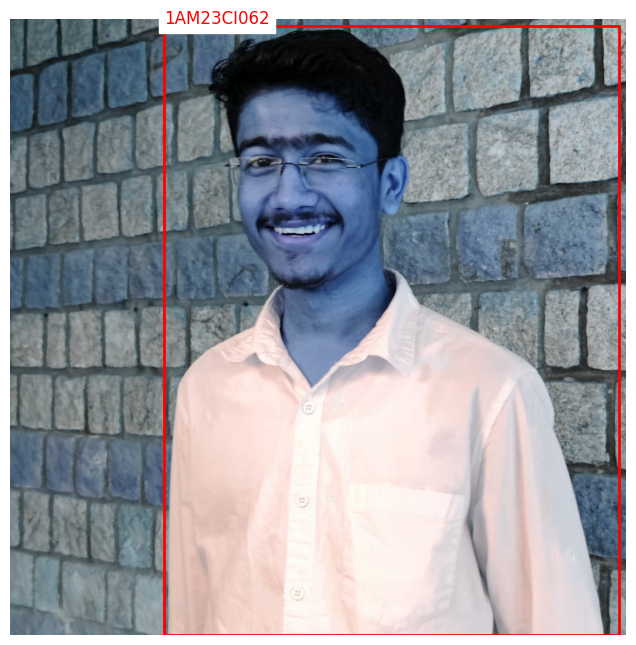

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_yolo_results(results):
    # Extract the first result if it's a list (usually a single result will be in the list)
    result = results[0] if isinstance(results, list) else results
    
    # Extract the original image from the result (this is a NumPy array)
    img_np = result.orig_img

    # Extract the bounding boxes and corresponding class labels
    boxes = result.boxes
    names = result.names

    # Plot the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_np)

    # Loop through the boxes and draw them on the image
    for i, box in enumerate(boxes.xyxy):  # Iterate over bounding boxes
        x1, y1, x2, y2 = box.cpu().numpy()  # Convert tensor to NumPy array
        
        # Draw the rectangle (bounding box)
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False)
        )
        
        # Display the class label (name)
        label = names[int(boxes.cls[i].cpu().numpy())]  # Get class name
        plt.text(
            x1, y1 - 5, label, color='red', fontsize=12, backgroundcolor='white'
        )
    
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming `results` is a list of results from YOLO model inference
plot_yolo_results(results)